In [2]:
from config_file import data_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [60]:
df = pd.read_csv(os.path.join(data_path, 'timestamp_artist.csv'))

In [61]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [62]:
df.drop(["id_artist"], axis=1, inplace=True)

KeyError: "['year_week'] not found in axis"

In [64]:
df.head()

,timestamp
0,2020-10-21 20:41:02.953054
1,2023-10-15 01:27:44.489225
2,2021-12-03 03:40:23.930224
3,2023-04-29 18:15:37.747772
4,2023-05-10 10:49:22.170440


In [68]:
df["helper"] = 1
df.head()

,timestamp,helper
0,2020-10-21 20:41:02.953054,1
1,2023-10-15 01:27:44.489225,1
2,2021-12-03 03:40:23.930224,1
3,2023-04-29 18:15:37.747772,1
4,2023-05-10 10:49:22.170440,1


In [69]:
# aggregate by week number
df_resampled = df.resample('W', on='timestamp').sum()
df_resampled.head()

,helper
timestamp,
2019-07-14,126
2019-07-21,665
2019-07-28,854
2019-08-04,1644
2019-08-11,1429


In [70]:
df_resampled.shape

(232, 1)

<Axes: xlabel='timestamp'>

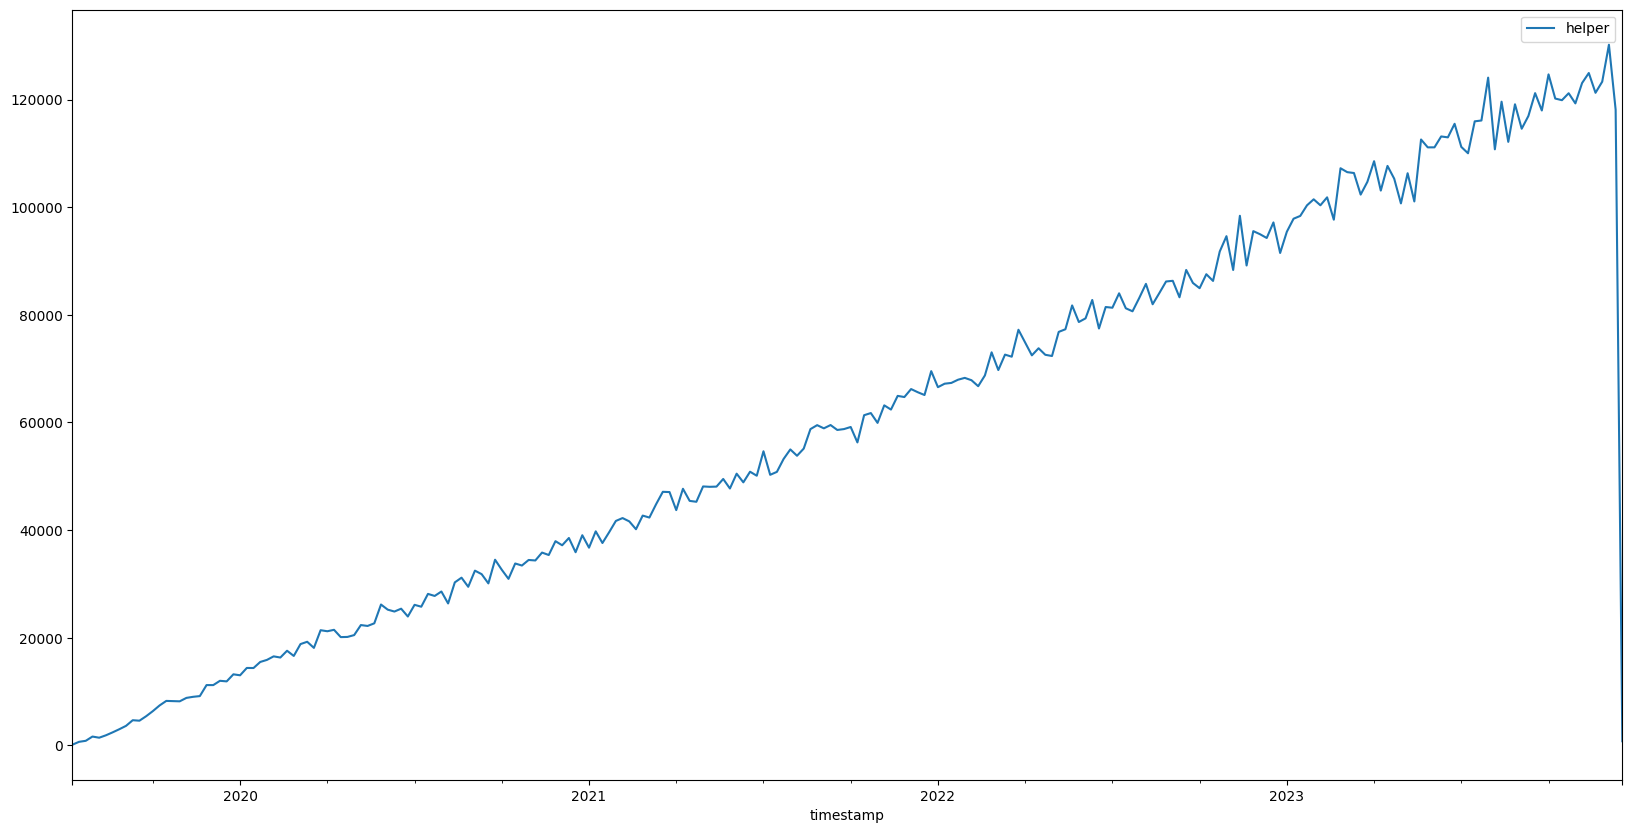

In [71]:
df_resampled.plot(figsize=(20, 10))

In [74]:
# drop last week
df_resampled_backup = df_resampled.copy()
df_resampled.drop(df_resampled.tail(1).index, inplace=True)

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_resampled, model='additive')

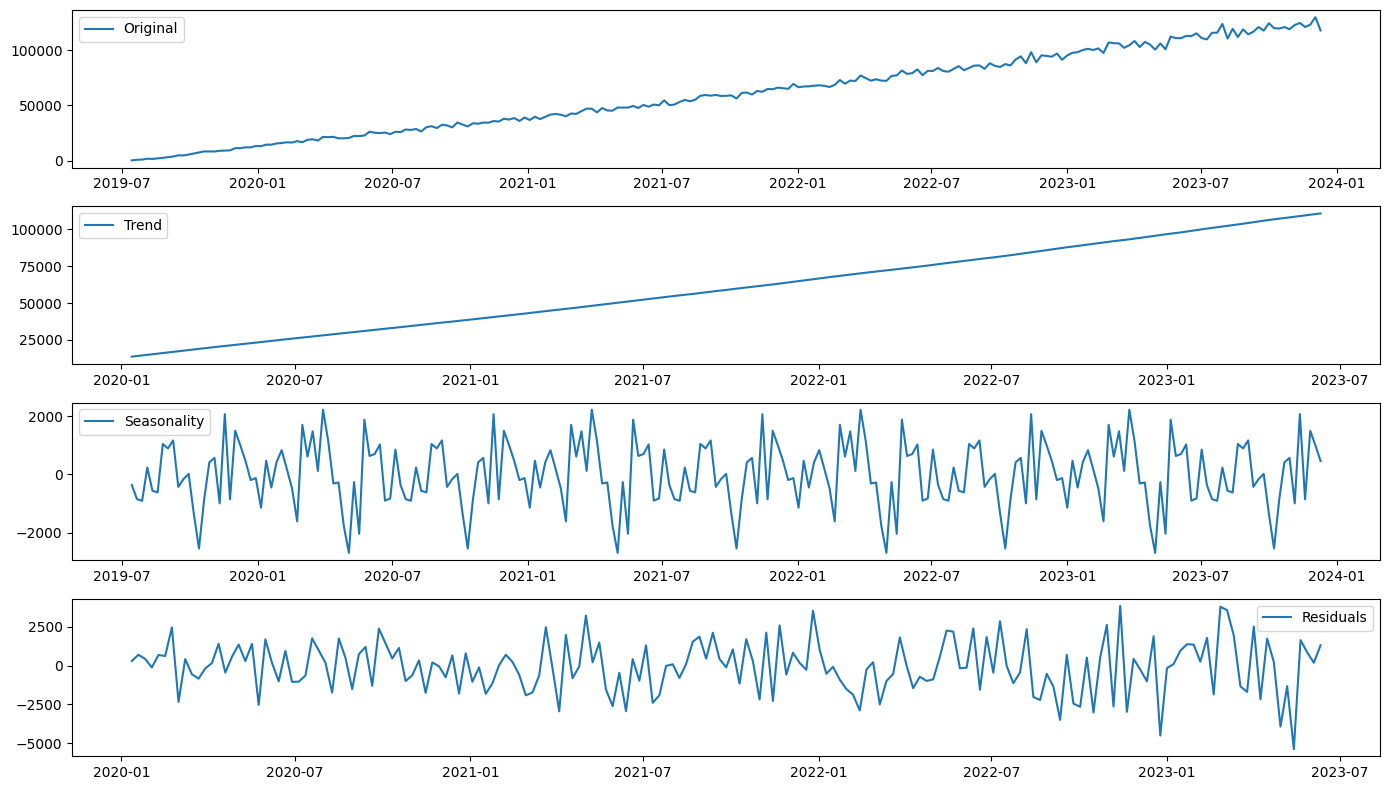

In [76]:
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df_resampled["helper"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()